<a href="https://colab.research.google.com/github/datasigntist/deeplearning/blob/master/shallowNeuralNetwork_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Vishwanathan Raman
**Email Id**: datasigntist@gmail.com

---


**Change History**


*   1-Jan-2018 -- Initial Creation
*   14-Aug-2019 -- Included detailed comments for each step


---

**Credits**
The code articulated here has been inspired from coursera deeplearning.ai Assignments


---

**Use Case Description**

This notebook develops a Shallow Neural Network to solve the Classification problem using Logistic Regression. A Shallow Neural Network has one single node through which input is processed.The dataset (.h5) is a collection of Cat Images. The data files needs to be uploaded to the Files section in the colab environment.  The library  h5py package (https://www.h5py.org/) is a Pythonic interface to the HDF5 binary data format. Each Image is a collection of R,G,B pixel intensity values represented as matrices, also called channels. The pixel intensity values are the features that defines the Image. Each Image is represented as a single vector of pixel intensity values.




*   Train dataset : https://github.com/datasigntist/datasetsForTraining/blob/master/train_catvnoncat.h5
*   Test dataset  : https://github.com/datasigntist/datasetsForTraining/blob/master/test_catvnoncat.h5



---


**Other Learning Resources**

The following youtube playlist lists all the concepts related to Deep Learning 

https://www.youtube.com/playlist?list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0

The following represents a Shallow Neural Network

![alt text](https://raw.githubusercontent.com/datasigntist/imagesforNotebook/master/Shallow%20Neural%20Network%20Representation.png)

The following is an example of an Image representation. Each Image is represented by 3 different matrices R, G and B. The R, G and B represents the pixel intensity values. Each Image is collapsed into a single vector of pixel intensity values

![alt text](https://raw.githubusercontent.com/datasigntist/imagesforNotebook/master/Dissection%20of%20an%20Image.png)

The following decodes the components of a single node



*   Linear Component
*   Non Linear Component or the Activation function

![alt text](https://raw.githubusercontent.com/datasigntist/imagesforNotebook/master/Decoding%20a%20single%20node.jpg)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [0]:
# This lists the files uploaded in the Files section. The following files will be lists
# train_catvnoncat.h5
# test_catvnoncat.h5
!ls

sample_data  test_catvnoncat.h5  train_catvnoncat.h5


In [0]:
# Exploring the train and test dataset
train_dataset = h5py.File('train_catvnoncat.h5', "r")
test_dataset = h5py.File('test_catvnoncat.h5', "r")

# train_dataset has 2 components
# train_set_x and train_set_y
print("Shape of train_dataset is ",train_dataset["train_set_x"].shape)
print("There are ",train_dataset["train_set_x"].shape[0]," images having a size of ",train_dataset["train_set_x"].shape[1:3]," pixels ")

print("-----------------------")

# test_dataset has 2 components
# test_set_x and test_set_y
print("Shape of test_dataset is ",test_dataset["test_set_x"].shape)
print("There are ",test_dataset["test_set_x"].shape[0]," images having a size of ",test_dataset["test_set_x"].shape[1:3]," pixels ")

Shape of train_dataset is  (209, 64, 64, 3)
There are  209  images having a size of  (64, 64)  pixels 
-----------------------
Shape of test_dataset is  (50, 64, 64, 3)
There are  50  images having a size of  (64, 64)  pixels 


In [0]:
# Creating a function load_dataset to process the train and test files
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


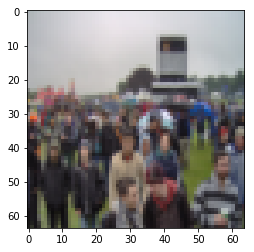

In [0]:
# Example of a picture
index = 100
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [0], it's a 'non-cat' picture.


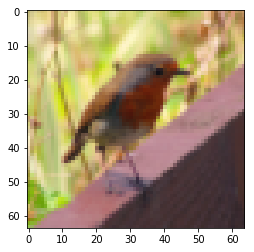

In [0]:
# Example of a picture
index = 10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")


In [0]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig[0].shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [0]:
# Reshape the training and test examples
# A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b*c*d, a) is to use:

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T 

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [0]:
# To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, 
# and so the pixel value is actually a vector of three numbers ranging from 0 to 255

train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [0]:
# Taking a single image into consideration
X = train_set_x[:,1]
X = X.reshape(X.shape[0],1)
print("Shape of X is :"+str(X.shape))

# Weights randomly assigned
W = np.zeros((X.shape))
print("Shape of W is :"+str(W.shape))

Shape of X is :(12288, 1)
Shape of W is :(12288, 1)


In [0]:
# For illustration using a single input
np.dot(W.T,X)

array([[0.]])

In [0]:
# For illustration using the entire input
np.dot(W.T,train_set_x)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [0]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim,1))
    b = 0
    
    return w, b

In [0]:
# Illustration of initialize_with_zeros
dim = train_set_x.shape[0]

W, b = initialize_with_zeros(dim)

print("Shape of W is "+str(W.shape))

Shape of W is (12288, 1)


In [0]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = (1/(1+np.exp(-z)))
   
    return s

In [0]:
# Illustration of sigmoid
print("Sigmoid of 10 is ",sigmoid(10))
print("Sigmoid of 0 is ",sigmoid(0))
print("Sigmoid of -10 is ",sigmoid(-10))

Sigmoid of 10 is  0.9999546021312976
Sigmoid of 0 is  0.5
Sigmoid of -10 is  4.5397868702434395e-05


Propagate function does the following
*   Forward Propagation
*   Compute Cost for logistic regression
*   Backward Propagation

Each iteration of Propagate will return the gradients and the cost.

In [0]:
def propagate(w, b, X, Y):
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b   
    """
    #### Get the number of examples
    m = X.shape[1]
        
    #### Given a set of weights w and b the forward propagation involves 2 steps
    Z = np.dot(w.T,X)+b
    A = sigmoid(Z)
    #### Compute the cost function using A
    cost = np.sum(np.dot(Y,np.log(A).T)+np.dot((1-Y),np.log(1-A).T))*(-1/m) 
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X,(A-Y).T)*(1/m)
    db = np.sum(A-Y)*(1/m)

    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

Optimize function does the following for a fixed number of iterations determined by num_iterations

*   Run the Propagate function and return the gradients and cost
*   Optimize the parameters W and b through the gradients calculated in the previous step
*   Through the iterations, the parameters W and b are optimized and the cost should ideally come down 
*   Initially the cost will be high since we are initializing W and b to both 0 and as iteration progresses the cost comes down



In [0]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    costs = []
    
    for i in range(num_iterations):     
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        # update rule (≈ 2 lines of code)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

The Predict function does the following
*   Once we have identified the parameters W and b, the predict function applies W and b to evaluate the outcome through the sigmoid function
*   Any value >= 0.5 is marked 1 else its marked as 0
*   Its essentially only a forward propagation

In [0]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    
    return Y_prediction

Model function encapsulates all the functions that has been coded so far
*   Initialize the parameters W and b
*   Optimize the parameters W and b



In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    dim = X_train.shape[0]
        
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(dim)

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d    

In [0]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


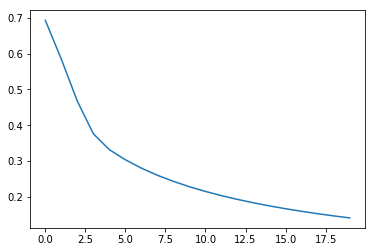

In [0]:
# Plotting the cost over the iterations.
plt.plot(range(0,len(d["costs"]),1),d["costs"])

As next steps, 
*   You can experiment with different hyper parameters like learning_rate
*   Randomly initialize W to see if the learning is faster, in the current code base we have initialized Ws to 0

